In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train_origin = pd.read_csv('../data/featured_data/X_train.csv')
y_train_origin = pd.read_csv('../data/featured_data/y_train.csv')

y_train_no_log = np.expm1(y_train_origin)

X_train_origin = X_train_origin.to_numpy()
y_train_no_log = y_train_no_log.to_numpy()
y_train_no_log = y_train_no_log.ravel()
X_train, X_val, y_train, y_val = train_test_split(X_train_origin, y_train_no_log, test_size=0.2, random_state=1) 
input_dim=X_train.shape[1]

In [3]:
model = Sequential()
model.add(Dense(64,input_dim=input_dim ,activation='relu') )
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu') )
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear')) 
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt ,loss='mean_squared_error')

In [4]:
epoch=300

In [5]:
history=model.fit(X_train, y_train,validation_data=(X_val,y_val),batch_size=20, epochs=epoch, verbose=1)

Train on 1168 samples, validate on 292 samples
Epoch 1/200
1168/1168 [==============================] - 1s 914us/sample - loss: 39290999653.6986 - val_loss: 38025506479.3425
Epoch 2/200
1168/1168 [==============================] - 0s 136us/sample - loss: 39286722426.7397 - val_loss: 38018790750.6849
Epoch 3/200
1168/1168 [==============================] - 0s 133us/sample - loss: 39274643441.9726 - val_loss: 38001468317.8082
Epoch 4/200
1168/1168 [==============================] - 0s 136us/sample - loss: 39246604224.8767 - val_loss: 37966157010.4110
Epoch 5/200
1168/1168 [==============================] - 0s 135us/sample - loss: 39192983236.3836 - val_loss: 37903264894.2466
Epoch 6/200
1168/1168 [==============================] - 0s 138us/sample - loss: 39103849205.4795 - val_loss: 37803064839.0137
Epoch 7/200
1168/1168 [==============================] - 0s 135us/sample - loss: 38973910941.8082 - val_loss: 37660836765.8082
Epoch 8/200
1168/1168 [==============================] - 0s 136u

1168/1168 [==============================] - 0s 137us/sample - loss: 3231759092.6027 - val_loss: 2923936157.8082
Epoch 66/200
1168/1168 [==============================] - 0s 132us/sample - loss: 3116224123.1781 - val_loss: 2844497856.8767
Epoch 67/200
1168/1168 [==============================] - 0s 137us/sample - loss: 3032616010.0822 - val_loss: 2783877039.3425
Epoch 68/200
1168/1168 [==============================] - 0s 137us/sample - loss: 2847478521.8630 - val_loss: 2718873628.0548
Epoch 69/200
1168/1168 [==============================] - 0s 138us/sample - loss: 2605071965.3699 - val_loss: 2650288533.0411
Epoch 70/200
1168/1168 [==============================] - 0s 137us/sample - loss: 2777862572.7123 - val_loss: 2580237189.2603
Epoch 71/200
1168/1168 [==============================] - 0s 138us/sample - loss: 2493442695.2329 - val_loss: 2522787575.2329
Epoch 72/200
1168/1168 [==============================] - 0s 133us/sample - loss: 2921110721.3151 - val_loss: 2484029569.7534
Epoch

Epoch 130/200
1168/1168 [==============================] - 0s 136us/sample - loss: 2122559067.1781 - val_loss: 1698393823.5616
Epoch 131/200
1168/1168 [==============================] - 0s 133us/sample - loss: 2000223155.7260 - val_loss: 1704232955.6164
Epoch 132/200
1168/1168 [==============================] - 0s 135us/sample - loss: 2084071795.2877 - val_loss: 1702284616.3288
Epoch 133/200
1168/1168 [==============================] - 0s 133us/sample - loss: 2071558318.4658 - val_loss: 1715270654.6849
Epoch 134/200
1168/1168 [==============================] - 0s 131us/sample - loss: 2090551729.7534 - val_loss: 1683873899.3973
Epoch 135/200
1168/1168 [==============================] - 0s 132us/sample - loss: 1960053342.4658 - val_loss: 1675468800.4384
Epoch 136/200
1168/1168 [==============================] - 0s 135us/sample - loss: 1996089575.6712 - val_loss: 1679915505.0959
Epoch 137/200
1168/1168 [==============================] - 0s 138us/sample - loss: 2087311080.7671 - val_loss: 

1168/1168 [==============================] - 0s 134us/sample - loss: 1964499179.8356 - val_loss: 1560040770.6301
Epoch 195/200
1168/1168 [==============================] - 0s 131us/sample - loss: 1851618894.0274 - val_loss: 1567022302.2466
Epoch 196/200
1168/1168 [==============================] - 0s 130us/sample - loss: 1816301489.5342 - val_loss: 1568021912.1096
Epoch 197/200
1168/1168 [==============================] - 0s 137us/sample - loss: 1730308104.7671 - val_loss: 1548460531.7260
Epoch 198/200
1168/1168 [==============================] - 0s 135us/sample - loss: 1810651942.1370 - val_loss: 1546881642.9589
Epoch 199/200
1168/1168 [==============================] - 0s 130us/sample - loss: 1872982006.3562 - val_loss: 1556644748.7123
Epoch 200/200
1168/1168 [==============================] - 0s 133us/sample - loss: 2000273272.9863 - val_loss: 1552384788.1644


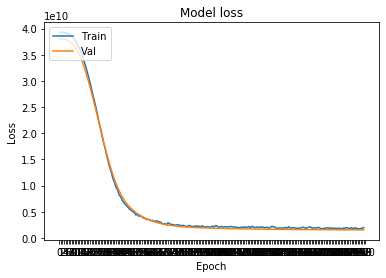

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [7]:
##  NN is not suitable for regression task, hard for hyperparameter tuning and explanation
##  RMSE > 38000, worse than ML models